In [1]:
import numpy as np
np.random.seed(0)
import tensorflow as tf

In [2]:
N, D, H = 64, 1000, 100
x = tf.placeholder(tf.float32, shape = (N,D))
y = tf.placeholder(tf.float32, shape = (N,D))
w1 = tf.Variable(tf.random_normal((D, H)))
w2 = tf.Variable(tf.random_normal((H,D)))
print (w1,w2)

<tf.Variable 'Variable:0' shape=(1000, 100) dtype=float32_ref> <tf.Variable 'Variable_1:0' shape=(100, 1000) dtype=float32_ref>


Here we use variable insteady of placeholders for the weights.

In [51]:
h = tf.maximum(tf.matmul(x,w1), 0)
y_pred = tf.matmul(h,w2)
diff = y_pred - y
#loss = tf.reduce_mean(tf.reduce_sum(diff**2,axis = 1))
loss = tf.losses.mean_squared_error(y_pred, y)
grad_w1, grad_w2 = tf.gradients(loss,[w1,w2])

###### Do training

In [32]:
learning_rate = 1.e-5
new_w1 = w1.assign(w1 - learning_rate*grad_w1)
new_w2 = w2.assign(w2 - learning_rate*grad_w2)
print(new_w1, new_w2)
updates = tf.group(new_w1,new_w2) 
print(updates)
#Add dummy graph node that depends on updates

Tensor("Assign_6:0", shape=(1000, 100), dtype=float32_ref) Tensor("Assign_7:0", shape=(100, 1000), dtype=float32_ref)
name: "group_deps_2"
op: "NoOp"
input: "^Assign_6"
input: "^Assign_7"



In [33]:
t_list = []
l_list = []
with tf.Session() as sess:
    """Run graph once to initialize w1 and w2"""
    sess.run(tf.global_variables_initializer())
    values = {
        x: np.random.randn(N,D),
        y: np.random.randn(N,D),
    }
    for t in range(50):
        """Run many times to train"""
        loss_val,up_weights =sess.run([loss,updates], feed_dict=values)
        t_list.append(t)
        l_list.append(loss_val)

In [37]:
'''show data'''
print("shaocong is married")
print(loss)

shaocong is married
Tensor("Mean:0", shape=(), dtype=float32)


In [35]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 

mpl.rc('font',family='Times New Roman',size = 25)
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2

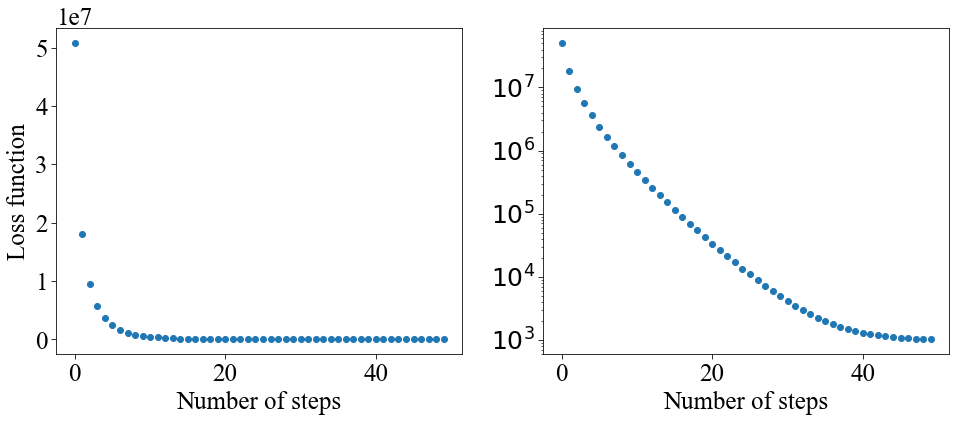

In [36]:
fig,ax  = plt.subplots(1,2,figsize=(16,6))
ax[0].scatter(t_list, l_list)
ax[0].set_xlabel("Number of steps")
ax[0].set_ylabel("Loss function")
ax[1].scatter(t_list, l_list)
ax[1].set_xlabel("Number of steps")
#ax[1].set_ylabel("Loss function")
ax[1].set_yscale("log")
plt.show()

##### Without doing the opimization by hand, Tensorflow provide some convenient ways of doing trainings

In [56]:
optimizer = tf.train.GradientDescentOptimizer(1.e-3)
updates = optimizer.minimize(loss)

In [57]:
t_list = []
l_list = []
with tf.Session() as sess:
    # initialize w1 and w2
    sess.run(tf.global_variables_initializer())
    values = {
        x: np.random.randn(N, D),
        y: np.random.randn(N, D),
    }
    for t in range(50):
        loss_val,op_val = sess.run([loss, updates], feed_dict = values)
        t_list.append(t)
        l_list.append(loss_val)

In [58]:
print(op_val)

None


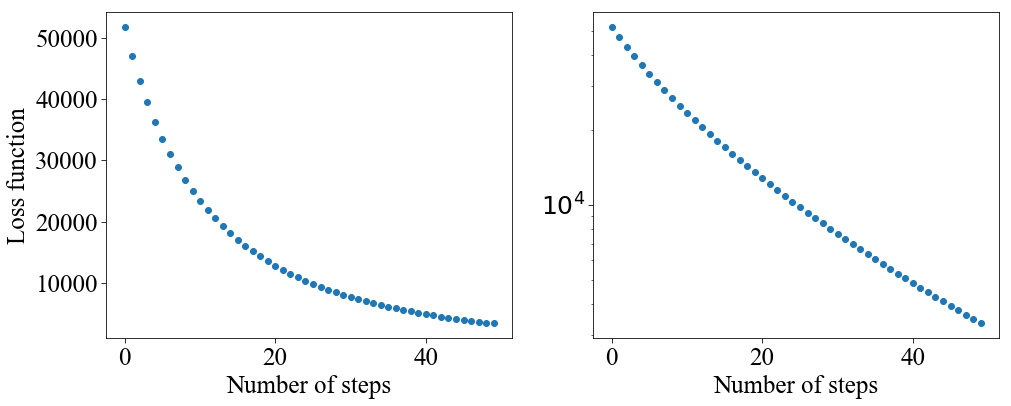

In [59]:
fig,ax  = plt.subplots(1,2,figsize=(16,6))
ax[0].scatter(t_list, l_list)
ax[0].set_xlabel("Number of steps")
ax[0].set_ylabel("Loss function")
ax[1].scatter(t_list, l_list)
ax[1].set_xlabel("Number of steps")
#ax[1].set_ylabel("Loss function")
ax[1].set_yscale("log")
plt.show()